In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
dfx = pd.read_csv("../Datasets/xdata.csv")
dfy = pd.read_csv("../Datasets/ydata.csv")

In [4]:
X = dfx.values
Y = dfy.values

# print(X)

print(X.shape)
print(Y.shape)

# print(Y)

(399, 3)
(399, 2)


In [5]:
X = X[:,1:]
Y = Y[:,1:].reshape((-1,))

print(X.shape)
print(Y.shape)

(399, 2)
(399,)


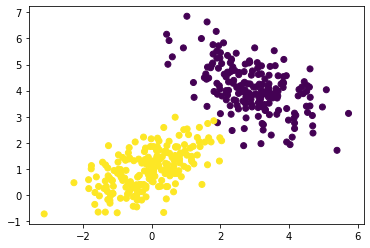

In [27]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

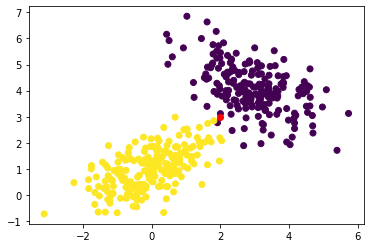

In [31]:
query_point = np.array([2,3])

plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_point[0],query_point[1],color="red")
plt.show()

# Now we have to classify query_point label 0/1

In [6]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):

    distances = []
    m = X.shape[0]

    for i in range(m):
        d = dist(queryPoint,X[i])
        distances.append((d,Y[i]))

    distances = sorted(distances)

    # Nearest first k distance
    distances = distances[:k]

    distances = np.array(distances)

    new_dist = np.unique(distances[:,1],return_counts=True)

    index = new_dist[1].argmax()

    prediction = new_dist[0][index]

    # print(new_dist)
    return prediction


    # print(distances)

In [59]:
pred = knn(X,Y,[0,0])
print(pred)

1.0


In [18]:
# KNN with train and test data

# basically X and Y combined are the training data and queryPoint is the test data

def knn(train,test,k=5):

    distances = []
    m = train.shape[0]

    for i in range(m):

        ix = train[i,:-1]
        iy = train[i,-1]
        d = dist(test,ix)
        distances.append((d,iy))

    distances = sorted(distances,key=lambda x:x[0])

    # Nearest first k distance
    distances = distances[:k]

    distances = np.array(distances)

    new_dist = np.unique(distances[:,-1],return_counts=True)

    index = new_dist[1].argmax()

    prediction = new_dist[0][index]

    # print(new_dist)
    return prediction


    # print(distances)

In [19]:
Y = np.reshape(Y,(-1,1))
# print(Y.shape)
traindata = np.concatenate((X,Y),axis=1)

In [22]:
output = knn(traindata,[4,5])
print(output)

0.0
